# Explore Strava data

## A note on privacy and data
Given that this notebook will be publicly available  on GitHub, I will attempt to keep most outputs anonymized. I will also not include the user data in the GitHub repository. Anyone who would like can use this notebook to analyze their own data by exporting it from Strava, unpacking and changing `DATA_DIR` in the setup.

## Setup

The cell below is based on the "Hands on introduction to Machine Learning" with some minor changes.

In [56]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = os.getcwd()
DATA_DIR = "export_53928742/"  # Change this per user
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")

def save_fig(fig_id, tight_layout=True, file_type="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + file_type)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Initial exploration

Let's first see what files we have

In [5]:
for filename in os.listdir(DATA_DIR):
    print(os.path.join(workdir, filename))

/home/leon/Strava_predict/routes.csv
/home/leon/Strava_predict/applications.csv
/home/leon/Strava_predict/email_preferences.csv
/home/leon/Strava_predict/information_we_disclose_for_a_business_purpose.pdf
/home/leon/Strava_predict/categories_of_personal_information_we_collect.pdf
/home/leon/Strava_predict/clubs.csv
/home/leon/Strava_predict/components.csv
/home/leon/Strava_predict/flags.csv
/home/leon/Strava_predict/favorites.csv
/home/leon/Strava_predict/bikes.csv
/home/leon/Strava_predict/connected_apps.csv
/home/leon/Strava_predict/mobile_device_identifiers.csv
/home/leon/Strava_predict/posts.csv
/home/leon/Strava_predict/segments.csv
/home/leon/Strava_predict/logins.csv
/home/leon/Strava_predict/challenges.csv
/home/leon/Strava_predict/activities
/home/leon/Strava_predict/routes
/home/leon/Strava_predict/profile.csv
/home/leon/Strava_predict/photos
/home/leon/Strava_predict/comments.csv
/home/leon/Strava_predict/starred_routes.csv
/home/leon/Strava_predict/memberships.csv
/home/leo

That's quite a few files! What's more, there is a directory called `activities` with a bunch of `.gpx` and `.tcx` files.

Let's first see whether any of these `.csv`'s contain any data.

In [9]:
import pandas as pd

for filename in os.listdir(DATA_DIR):
    if not ".csv" in filename: # Can only read csv
        continue
    df = pd.read_csv(os.path.join(DATA_DIR, filename))
    print(len(df.index), filename)

0 routes.csv
0 applications.csv
1 email_preferences.csv
0 clubs.csv
0 components.csv
0 flags.csv
0 favorites.csv
0 bikes.csv
2 connected_apps.csv
1 mobile_device_identifiers.csv
0 posts.csv
0 segments.csv
3 logins.csv
0 challenges.csv
1 profile.csv
0 comments.csv
0 starred_routes.csv
0 memberships.csv
1 partner_opt_outs.csv
0 starred_segments.csv
0 support_tickets.csv
0 photos.csv
1 visibility_settings.csv
0 following.csv
0 goals.csv
1 social_settings.csv
0 followers.csv
46 activities.csv
0 privacy_zones.csv
0 contacts.csv
1 general_preferences.csv
0 orders.csv
0 events.csv
0 blocks.csv
0 shoes.csv
0 kudos.csv


Alright! Most of these are (almost) empty, but `activities.csv` contains some data. Let's explore that one further.

In [13]:
pd.set_option('display.max_columns', None)
activities_df = pd.read_csv(os.path.join(DATA_DIR, "activities.csv"))
activities_df.head(10)

,Activity ID,Activity Date,Activity Name,Activity Type,Activity Description,Elapsed Time,Distance,Relative Effort,Commute,Activity Gear,Filename,Athlete Weight,Bike Weight,Elapsed Time.1,Moving Time,Distance.1,Max Speed,Average Speed,Elevation Gain,Elevation Loss,Elevation Low,Elevation High,Max Grade,Average Grade,Average Positive Grade,Average Negative Grade,Average Cadence,Max Cadence,Max Heart Rate,Average Heart Rate,Max Watts,Average Watts,Calories,Max Temperature,Average Temperature,Relative Effort.1,Total Work,Number of Runs,Uphill Time,Downhill Time,Other Time,Perceived Exertion,Weighted Average Power,Power Count,Prefer Perceived Exertion,Perceived Relative Effort,Commute.1,Total Weight Lifted,From Upload,Grade Adjusted Distance,Weather Observation Time,Weather Condition,Weather Temperature,Apparent Temperature,Dewpoint,Humidity,Weather Pressure,Wind Speed,Wind Gust,Wind Bearing,Precipitation Intensity,Sunrise Time,Sunset Time,Moon Phase,Bike,Gear,Precipitation Probability,Precipitation Type,Cloud Cover,Weather Visibility,UV Index,Weather Ozone
0,3280026917,"10 Apr 2020, 11:42:35",Lunch Walk,Walk,NaN,11023,17.11,NaN,False,NaN,activities/3506348902.gpx.gz,NaN,NaN,11023.0,10429.0,17116.400391,NaN,1.641231,144.736084,147.436005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3284927129,"11 Apr 2020, 14:58:48",Afternoon Run,Run,NaN,2276,4.82,NaN,False,NaN,activities/3511518186.gpx.gz,NaN,NaN,2276.0,2227.0,4819.899902,NaN,2.164302,8.514936,12.914940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,4835.399902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3288820056,"12 Apr 2020, 10:18:09",Lunch Walk,Walk,NaN,7559,13.41,NaN,False,NaN,activities/3515624849.gpx.gz,NaN,NaN,7559.0,7492.0,13410.400391,NaN,1.789963,137.692017,142.692001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3294224432,"13 Apr 2020, 15:35:48",Afternoon Run,Run,NaN,2605,5.63,NaN,False,NaN,activities/3521334801.gpx.gz,NaN,NaN,2605.0,2291.0,5635.100098,NaN,2.459668,12.039685,12.339700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,5682.799805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3298383533,"14 Apr 2020, 15:55:02",Afternoon Walk,Walk,NaN,2654,3.63,5.0,False,NaN,activities/3525725030.tcx.gz,NaN,NaN,2654.0,2654.0,3633.300049,NaN,1.368990,14.622866,15.522900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,303.000000,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3307855286,"16 Apr 2020, 15:41:12",Afternoon Walk,Walk,NaN,3566,4.52,7.0,False,NaN,activities/3535682820.tcx.gz,NaN,NaN,3566.0,3486.0,4524.299805,NaN,1.297849,8.098907,8.498910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,412.000000,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3311843422,"17 Apr 2020, 13:25:40",Afternoon Walk,Walk,NaN,4960,0.00,0.0,False,NaN,activities/3539869421.tcx.gz,NaN,NaN,4960.0,1.0,1.400000,NaN,1.400000,NaN,-0.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.143633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3321609496,"19 Apr 2020, 12:22:18",Afternoon Walk,Walk,NaN,6160,3.97,8.0,False,NaN,activities/3550179276.tcx.gz,NaN,NaN,6160.0,3401.0,3974.100098,NaN,1.168509,79.445702,77.245697,NaN,NaN,

So we have 45 activities here. There are 72 columnns?! What are those?

In [12]:
activities_df.columns.values

array(['Activity ID', 'Activity Date', 'Activity Name', 'Activity Type',
       'Activity Description', 'Elapsed Time', 'Distance',
       'Relative Effort', 'Commute', 'Activity Gear', 'Filename',
       'Athlete Weight', 'Bike Weight', 'Elapsed Time.1', 'Moving Time',
       'Distance.1', 'Max Speed', 'Average Speed', 'Elevation Gain',
       'Elevation Loss', 'Elevation Low', 'Elevation High', 'Max Grade',
       'Average Grade', 'Average Positive Grade',
       'Average Negative Grade', 'Average Cadence', 'Max Cadence',
       'Max Heart Rate', 'Average Heart Rate', 'Max Watts',
       'Average Watts', 'Calories', 'Max Temperature',
       'Average Temperature', 'Relative Effort.1', 'Total Work',
       'Number of Runs', 'Uphill Time', 'Downhill Time', 'Other Time',
       'Perceived Exertion', 'Weighted Average Power', 'Power Count',
       'Prefer Perceived Exertion', 'Perceived Relative Effort',
       'Commute.1', 'Total Weight Lifted', 'From Upload',
       'Grade Adjusted Dis

## Defining the challenge

Alright, we can do something with this. Let's set some goals and rules, and identify problems and challenges.

### Goal
I want to predict the average pace (time per kilometer) of an activity based on "non-cheating" features (see below).

### Rules
I am not allowed to use features that are directly related to the pace or performance. In other words, I want to predict performance based only on the circumstances (time of day, time of year, weather, route). That means I should exclude:
- any `Time` data
- any `Distance` data
- any `Speed` data
- any `cadence` data
- any `Watts` data
- `Calories`
- any `Effort` data
- any `Power` data

Borderline are:
- Any `Elevation` and `Grade` data.

### Problems & challenges
- Date and time are combined, but should probably be separate features. A morning run might for example be easier than an evening run, while the date influences both overall changes in fitness, as well as climate.
- There are many columns for weather data, but none of them contain any values. Can I somehow import those?
- There is no location data. I would like to use the start- and endpoint of each activity as a standalone feature (as proxy for the particularities of any given route -- the hillier, the slower). I also need the location to get weather data automatically.

## Finding location data

As noted above, including location data in the analysis would be very helpful. Luckily, we have a bunch of `.tcx` files that _should_ contain some location info. Also, of course, somebody has written a [parser](https://pypi.org/project/python-tcxparser/) for these files (available via `pip install python-tcxparser`. Let's see if we can extract some info.

Note: the `.tcx` files I received from Strava have some leading whitespace, which causes issues when parsing the XML info. We need to strip the leading whitespace.

In [34]:
import shutil

def clean_leading_whitespace(filename):
    '''Remove leading whitespace from a file.
    '''
    newline = os.linesep  # Works independently of OS.
    
    source = open(filename, 'r')
    target = open(filename + "_temp", 'w')
    
    firstline = True
    for line in source:
        if firstline:
            if line[0] == "<":  # No need to change anything. Specific to XML.
                return
            line = line.lstrip()
            firstline = False
        target.write(line + newline)
    
    os.remove(filename)
    os.rename(filename + "_temp", filename)

In [ ]:
import tcxparser

activities_dir = os.path.join(DATA_DIR, "activities/")

for filename in os.listdir(activities_dir):
    print(filename)
    if not ".tcx" in filename:
        continue
    clean_leading_whitespace(os.path.join(activities_dir, filename))
    tcx_data = tcxparser.TCXParser(os.path.join(activities_dir, filename))
    break  # Only trying to investigate a single file for now.

print(tcx_data.latitude, tcx_data.longitude)

Brilliant, that works! We have latitude and longitude. Now let's see if we can get weather data.

## Weather data

We need to find some way to get historical weather data for each of the activities in the dataset. [This blog](https://www.freecodecamp.org/news/obtain-historical-weather-forecast-data-in-csv-format-using-python/) suggests to use the historical weather API from [World Weather Online](https://www.worldweatheronline.com/developer/api/historical-weather-api.aspx). The API looks promising: it allows me to get historical weather data based on timestamps and latitude/longitude data, which is exactly the data I have. However, it is only accessible via a paid subscription or free trial. Therefore, I will wait until I have finished more of the project, so I will know if this data is going to be useful.

## Feature selection

Now it's time to start looking at which features are going to be useful. I am also starting to think that predicting the pace is not going to see great success without looking at things like heart rate and effort scores. I am keeping an open mind about my goals for this project: perhaps I will change targets to max heart rate or calories or something other.

In any case, let's first drop all those columns full of `NaN`'s.

In [45]:
for column in activities_df.columns.values:
    if np.all(activities_df[column].isna()):
        print("Dropping column", column)
        activities_df.drop(column, axis=1, inplace=True)  # axis=1 to drop columns.

activities_df.head(5)

,Activity ID,Activity Date,Activity Name,Activity Type,Elapsed Time,Distance,Relative Effort,Commute,Filename,Elapsed Time.1,Moving Time,Distance.1,Max Speed,Average Speed,Elevation Gain,Elevation Loss,Elevation Low,Elevation High,Max Grade,Average Grade,Average Heart Rate,Calories,Relative Effort.1,Commute.1,From Upload,Grade Adjusted Distance,Weather Observation Time,Weather Condition,Weather Temperature,Apparent Temperature,Dewpoint,Humidity,Weather Pressure,Wind Speed,Wind Gust,Wind Bearing,Precipitation Intensity,Sunrise Time,Sunset Time,Moon Phase,Precipitation Probability,Cloud Cover,Weather Visibility,UV Index,Weather Ozone
0,3280026917,"10 Apr 2020, 11:42:35",Lunch Walk,Walk,11023,17.11,NaN,False,activities/3506348902.gpx.gz,11023.0,10429.0,17116.400391,NaN,1.641231,144.736084,147.436005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3284927129,"11 Apr 2020, 14:58:48",Afternoon Run,Run,2276,4.82,NaN,False,activities/3511518186.gpx.gz,2276.0,2227.0,4819.899902,NaN,2.164302,8.514936,12.914940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,4835.399902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3288820056,"12 Apr 2020, 10:18:09",Lunch Walk,Walk,7559,13.41,NaN,False,activities/3515624849.gpx.gz,7559.0,7492.0,13410.400391,NaN,1.789963,137.692017,142.692001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3294224432,"13 Apr 2020, 15:35:48",Afternoon Run,Run,2605,5.63,NaN,False,activities/3521334801.gpx.gz,2605.0,2291.0,5635.100098,NaN,2.459668,12.039685,12.339700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,5682.799805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3298383533,"14 Apr 2020, 15:55:02",Afternoon Walk,Walk,2654,3.63,5.0,False,activities/3525725030.tcx.gz,2654.0,2654.0,3633.300049,NaN,1.368990,14.622866,15.522900,NaN,NaN,NaN,NaN,NaN,303.0,5.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There's still a lot of mostly-empty columns there. Interesting...

In [44]:
activities_df.describe()

,Activity ID,Elapsed Time,Distance,Relative Effort,Elapsed Time.1,Moving Time,Distance.1,Max Speed,Average Speed,Elevation Gain,Elevation Loss,Elevation Low,Elevation High,Max Grade,Average Grade,Average Heart Rate,Calories,Relative Effort.1,Commute.1,From Upload,Grade Adjusted Distance,Weather Observation Time,Weather Condition,Weather Temperature,Apparent Temperature,Dewpoint,Humidity,Weather Pressure,Wind Speed,Wind Gust,Wind Bearing,Precipitation Intensity,Sunrise Time,Sunset Time,Moon Phase,Precipitation Probability,Cloud Cover,Weather Visibility,UV Index,Weather Ozone
count,4.600000e+01,46.000000,46.000000,42.000000,46.000000,46.000000,46.000000,10.00000,46.000000,44.000000,46.000000,10.000000,10.000000,10.000000,10.000000,10.000000,42.000000,40.000000,46.0,46.0,9.000000,1.000000e+00,1.0,1.00,1.00,1.00,1.00,1.000000,1.00,1.00,1.0,1.0,1.000000e+00,1.000000e+00,1.00,1.0,1.00,1.0,1.0,1.000000
mean,3.401100e+09,4729.130435,6.405217,17.000000,4729.130435,4385.021739,6409.037017,2.20000,1.545049,54.962141,53.431180,7.350000,36.680001,23.910000,-0.096490,112.933582,634.955801,17.850000,0.0,1.0,4754.144455,1.590775e+09,1.0,23.08,23.08,9.32,0.42,1023.900024,3.23,4.48,95.0,0.0,1.590725e+09,1.590783e+09,0.24,0.0,0.05,16093.0,1.0,324.600006
std,7.648417e+07,2533.738122,3.630742,15.231546,2533.738122,2522.348742,3631.094211,0.68313,0.431747,55.484264,55.107878,1.140419,35.389416,16.374808,0.292026,23.950226,355.169541,15.110787,0.0,0.0,1827.740996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.280027e+09,105.000000,0.000000,0.000000,105.000000,1.000000,1.400000,1.60000,1.059398,2.187515,-0.800000,5.700000,11.000000,4.600000,-0.911071,91.614243,0.143633,0.000000,0.0,1.0,243.699997,1.590775e+09,1.0,23.08,23.08,9.32,0.42,1023.900024,3.23,4.48,95.0,0.0,1.590725e+09,1.590783e+09,0.24,0.0,0.05,16093.0,1.0,324.600006
25%,3.337374e+09,2666.500000,4.355000,8.250000,2666.500000,2464.250000,4358.624878,1.82500,1.301002,8.629992,10.657455,6.175000,14.775000,11.625000,-0.063369,98.436104,461.250000,9.000000,0.0,1.0,4467.399902,1.590775e+09,1.0,23.08,23.08,9.32,0.42,1023.900024,3.23,4.48,95.0,0.0,1.590725e+09,1.590783e+09,0.24,0.0,0.05,16093.0,1.0,324.600006
50%,3.394279e+09,4537.000000,5.680000,13.500000,4537.000000,4030.000000,5685.550049,1.95000,1.378780,23.409397,20.477850,7.850000,16.600000,19.950000,-0.028193,104.778206,561.000000,14.000000,0.0,1.0,5584.500000,1.590775e+09,1.0,23.08,23.08,9.32,0.42,1023.900024,3.23,4.48,95.0,0.0,1.590725e+09,1.590783e+09,0.24,0.0,0.05,16093.0,1.0,324.600006
75%,3.454912e+09,6325.000000,7.785000,21.500000,6325.000000,5453.250000,7786.925049,2.07500,1.625946,85.670261,87.138475,8.250000,59.075002,39.000000,0.019176,111.340305,789.500000,22.250000,0.0,1.0,5682.799805,1.590775e+09,1.0,23.08,23.08,9.32,0.42,1023.900024,3.23,4.48,95.0,0.0,1.590725e+09,1.590783e+09,0.24,0.0,0.05,16093.0,1.0,324.600006
max,3.532435e+09,11023.000000,17.110000,72.000000,11023.000000,10429.000000,17116.400391,3.70000,2.752435,196.514099,195.514008,8.400000,102.900002,49.000000,0.117412,157.115204,1490.000000,72.000000,0.0,1.0,6105.000000,1.590775e+09,1.0,23.08,23.08,9.32,0.42,1023.900024,3.23,4.48,95.0,0.0,1.590725e+09,1.590783e+09,0.24,0.0,0.05,16093.0,1.0,324.600006


Ah, so there is a single entry for all the weather data! That's not going to help much, so let's delete any column with fewer than 10 entries.

In [49]:
for column in activities_df.columns.values:
    if activities_df[column].count() < 10:
        print("Dropping column", column)
        activities_df.drop(column, axis=1, inplace=True)

activities_df.head(5)

Dropping column Grade Adjusted Distance
Dropping column Weather Observation Time
Dropping column Weather Condition
Dropping column Weather Temperature
Dropping column Apparent Temperature
Dropping column Dewpoint
Dropping column Humidity
Dropping column Weather Pressure
Dropping column Wind Speed
Dropping column Wind Gust
Dropping column Wind Bearing
Dropping column Precipitation Intensity
Dropping column Sunrise Time
Dropping column Sunset Time
Dropping column Moon Phase
Dropping column Precipitation Probability
Dropping column Cloud Cover
Dropping column Weather Visibility
Dropping column UV Index
Dropping column Weather Ozone


,Activity ID,Activity Date,Activity Name,Activity Type,Elapsed Time,Distance,Relative Effort,Commute,Filename,Elapsed Time.1,Moving Time,Distance.1,Max Speed,Average Speed,Elevation Gain,Elevation Loss,Elevation Low,Elevation High,Max Grade,Average Grade,Average Heart Rate,Calories,Relative Effort.1,Commute.1,From Upload
0,3280026917,"10 Apr 2020, 11:42:35",Lunch Walk,Walk,11023,17.11,NaN,False,activities/3506348902.gpx.gz,11023.0,10429.0,17116.400391,NaN,1.641231,144.736084,147.436005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
1,3284927129,"11 Apr 2020, 14:58:48",Afternoon Run,Run,2276,4.82,NaN,False,activities/3511518186.gpx.gz,2276.0,2227.0,4819.899902,NaN,2.164302,8.514936,12.914940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
2,3288820056,"12 Apr 2020, 10:18:09",Lunch Walk,Walk,7559,13.41,NaN,False,activities/3515624849.gpx.gz,7559.0,7492.0,13410.400391,NaN,1.789963,137.692017,142.692001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
3,3294224432,"13 Apr 2020, 15:35:48",Afternoon Run,Run,2605,5.63,NaN,False,activities/3521334801.gpx.gz,2605.0,2291.0,5635.100098,NaN,2.459668,12.039685,12.339700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
4,3298383533,"14 Apr 2020, 15:55:02",Afternoon Walk,Walk,2654,3.63,5.0,False,activities/3525725030.tcx.gz,2654.0,2654.0,3633.300049,NaN,1.368990,14.622866,15.522900,NaN,NaN,NaN,NaN,NaN,303.0,5.0,0.0,1.0


In [50]:
activities_df.describe()

,Activity ID,Elapsed Time,Distance,Relative Effort,Elapsed Time.1,Moving Time,Distance.1,Max Speed,Average Speed,Elevation Gain,Elevation Loss,Elevation Low,Elevation High,Max Grade,Average Grade,Average Heart Rate,Calories,Relative Effort.1,Commute.1,From Upload
count,4.600000e+01,46.000000,46.000000,42.000000,46.000000,46.000000,46.000000,10.00000,46.000000,44.000000,46.000000,10.000000,10.000000,10.000000,10.000000,10.000000,42.000000,40.000000,46.0,46.0
mean,3.401100e+09,4729.130435,6.405217,17.000000,4729.130435,4385.021739,6409.037017,2.20000,1.545049,54.962141,53.431180,7.350000,36.680001,23.910000,-0.096490,112.933582,634.955801,17.850000,0.0,1.0
std,7.648417e+07,2533.738122,3.630742,15.231546,2533.738122,2522.348742,3631.094211,0.68313,0.431747,55.484264,55.107878,1.140419,35.389416,16.374808,0.292026,23.950226,355.169541,15.110787,0.0,0.0
min,3.280027e+09,105.000000,0.000000,0.000000,105.000000,1.000000,1.400000,1.60000,1.059398,2.187515,-0.800000,5.700000,11.000000,4.600000,-0.911071,91.614243,0.143633,0.000000,0.0,1.0
25%,3.337374e+09,2666.500000,4.355000,8.250000,2666.500000,2464.250000,4358.624878,1.82500,1.301002,8.629992,10.657455,6.175000,14.775000,11.625000,-0.063369,98.436104,461.250000,9.000000,0.0,1.0
50%,3.394279e+09,4537.000000,5.680000,13.500000,4537.000000,4030.000000,5685.550049,1.95000,1.378780,23.409397,20.477850,7.850000,16.600000,19.950000,-0.028193,104.778206,561.000000,14.000000,0.0,1.0
75%,3.454912e+09,6325.000000,7.785000,21.500000,6325.000000,5453.250000,7786.925049,2.07500,1.625946,85.670261,87.138475,8.250000,59.075002,39.000000,0.019176,111.340305,789.500000,22.250000,0.0,1.0
max,3.532435e+09,11023.000000,17.110000,72.000000,11023.000000,10429.000000,17116.400391,3.70000,2.752435,196.514099,195.514008,8.400000,102.900002,49.000000,0.117412,157.115204,1490.000000,72.000000,0.0,1.0


Wonderful. Now a few manual deletions (there are a few duplicate columns).

In [52]:
activities_df.drop(['Elapsed Time.1', 'Distance.1', 'Commute.1', 'Relative Effort.1'], axis=1, inplace=True)
activities_df.describe()

,Activity ID,Elapsed Time,Distance,Relative Effort,Moving Time,Max Speed,Average Speed,Elevation Gain,Elevation Loss,Elevation Low,Elevation High,Max Grade,Average Grade,Average Heart Rate,Calories,From Upload
count,4.600000e+01,46.000000,46.000000,42.000000,46.000000,10.00000,46.000000,44.000000,46.000000,10.000000,10.000000,10.000000,10.000000,10.000000,42.000000,46.0
mean,3.401100e+09,4729.130435,6.405217,17.000000,4385.021739,2.20000,1.545049,54.962141,53.431180,7.350000,36.680001,23.910000,-0.096490,112.933582,634.955801,1.0
std,7.648417e+07,2533.738122,3.630742,15.231546,2522.348742,0.68313,0.431747,55.484264,55.107878,1.140419,35.389416,16.374808,0.292026,23.950226,355.169541,0.0
min,3.280027e+09,105.000000,0.000000,0.000000,1.000000,1.60000,1.059398,2.187515,-0.800000,5.700000,11.000000,4.600000,-0.911071,91.614243,0.143633,1.0
25%,3.337374e+09,2666.500000,4.355000,8.250000,2464.250000,1.82500,1.301002,8.629992,10.657455,6.175000,14.775000,11.625000,-0.063369,98.436104,461.250000,1.0
50%,3.394279e+09,4537.000000,5.680000,13.500000,4030.000000,1.95000,1.378780,23.409397,20.477850,7.850000,16.600000,19.950000,-0.028193,104.778206,561.000000,1.0
75%,3.454912e+09,6325.000000,7.785000,21.500000,5453.250000,2.07500,1.625946,85.670261,87.138475,8.250000,59.075002,39.000000,0.019176,111.340305,789.500000,1.0
max,3.532435e+09,11023.000000,17.110000,72.000000,10429.000000,3.70000,2.752435,196.514099,195.514008,8.400000,102.900002,49.000000,0.117412,157.115204,1490.000000,1.0


Now, let's get some histograms to see how our features are distributed.

Saving figure attribute_histogram_plots


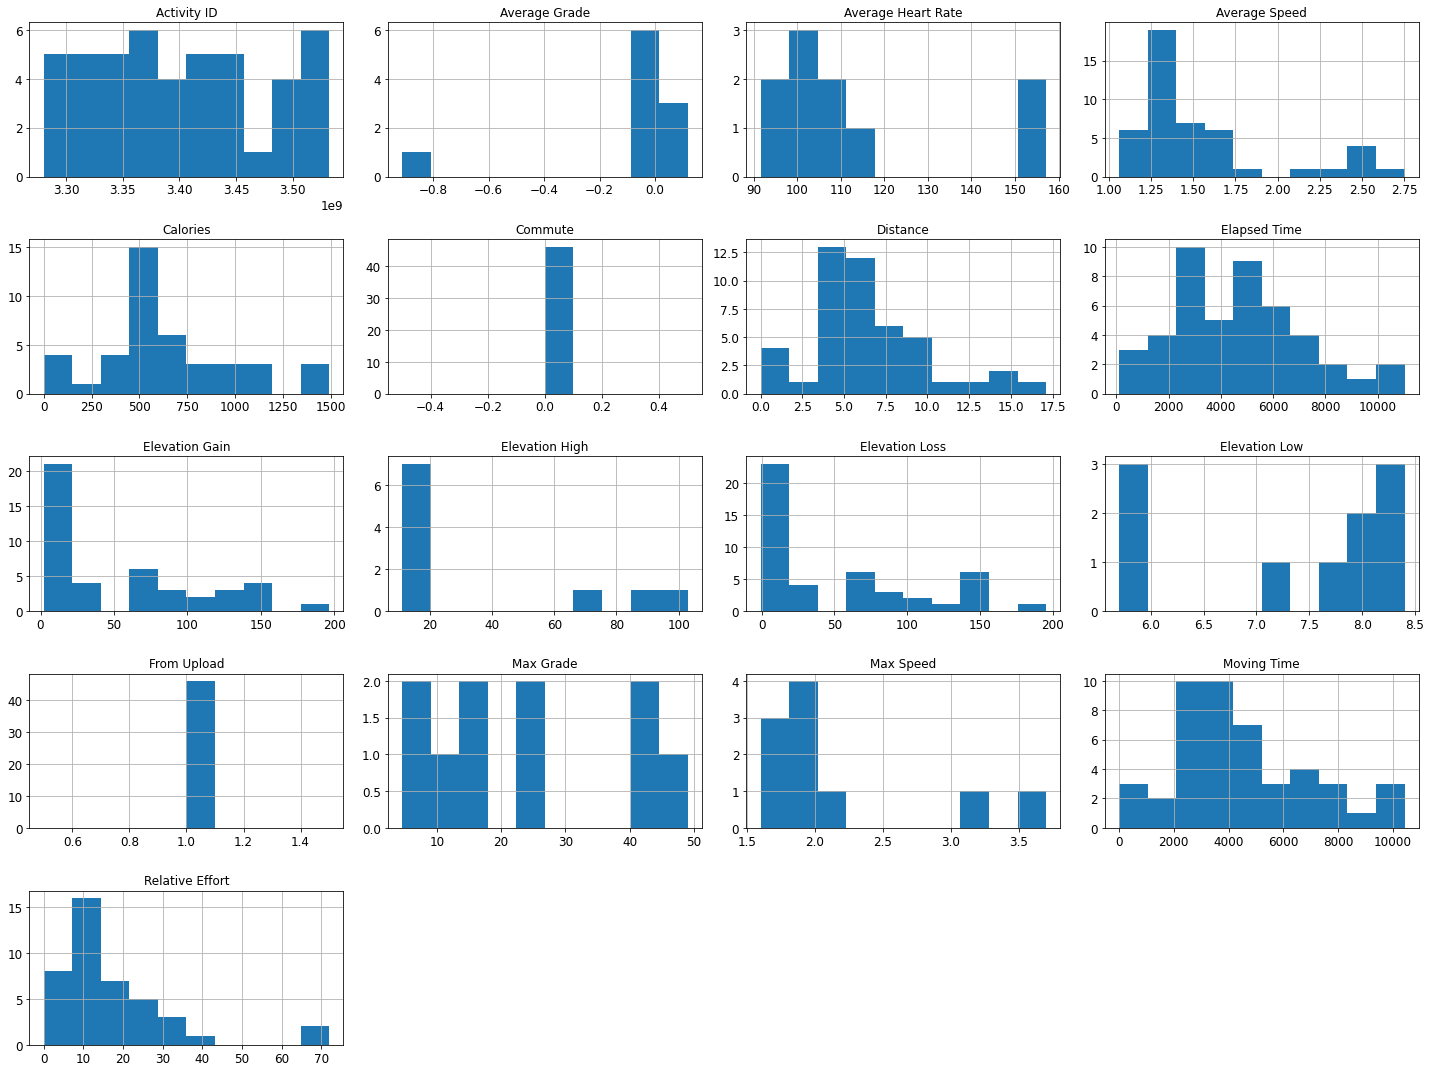

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
activities_df.hist(figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

Well, that will be a challenge. We don't have a lot of data, so the histograms are very rough. There are a few features that are definitely not going to help, because they only have 1 value. Let's drop those.

In [61]:
activities_df.drop(['Commute', 'From Upload'], axis=1, inplace=True)

KeyError: "['Commute' 'From Upload'] not found in axis"

Now, see if there is anything resembling a correlation in this mess.

Saving figure scatter_matrix_plot1
Saving figure scatter_matrix_plot2
Saving figure scatter_matrix_plot3


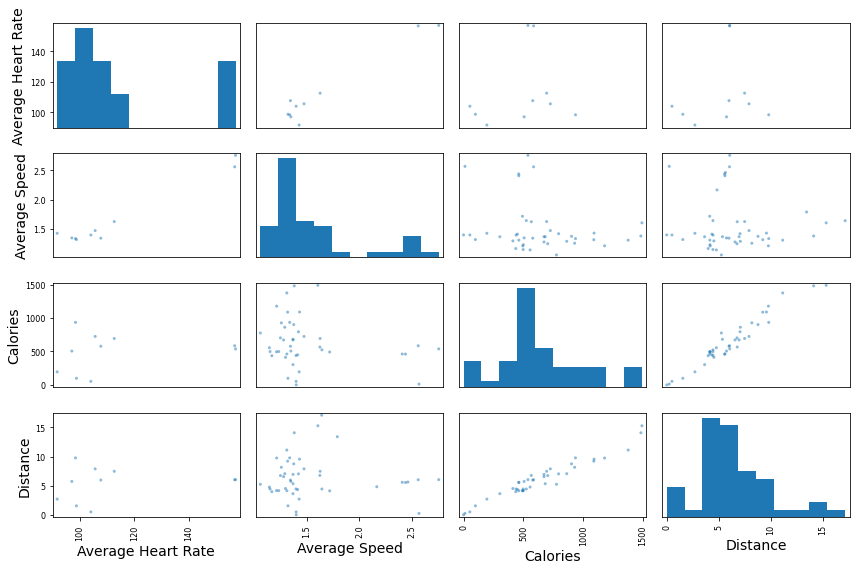

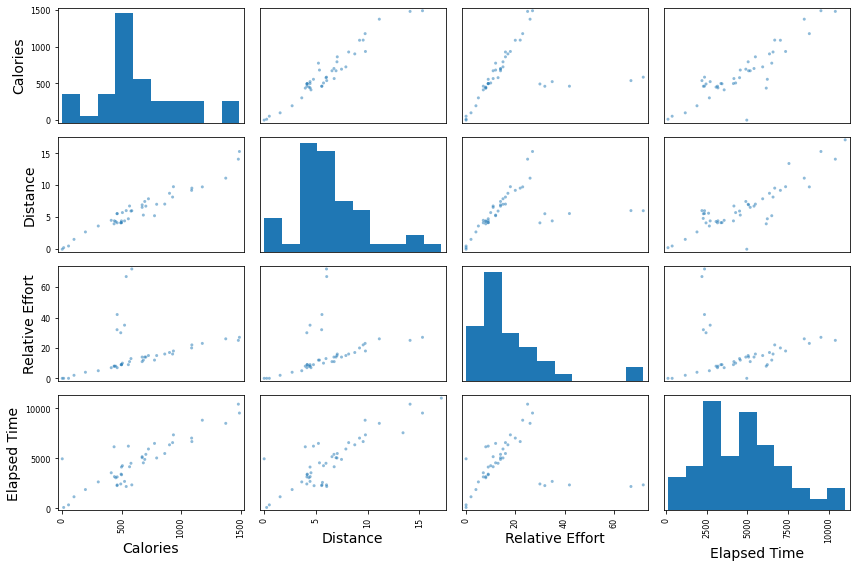

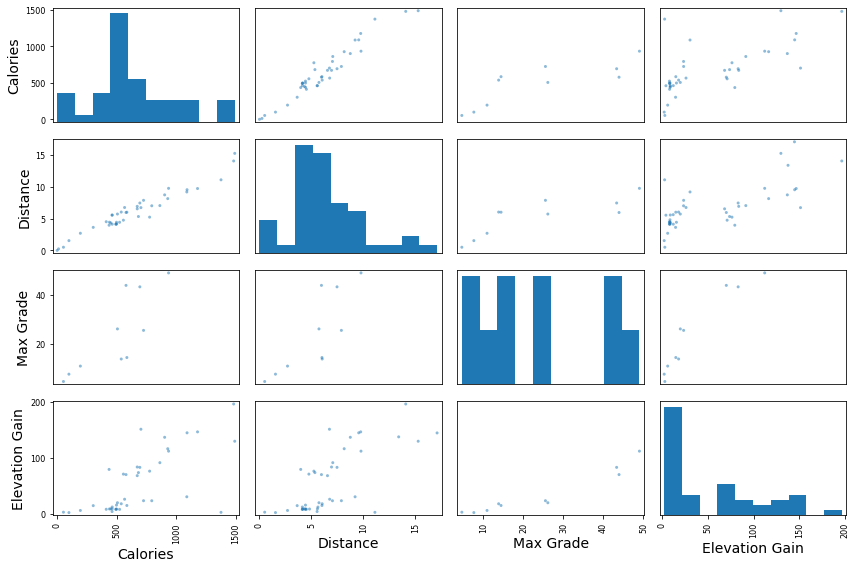

In [67]:
from pandas.plotting import scatter_matrix

attributes = ["Average Heart Rate", "Average Speed", "Calories", "Distance"]
#               "Elapsed Time", "Moving Time", "Relative Effort"]
scatter_matrix(activities_df[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot1")

attributes = ["Calories", "Distance", "Relative Effort", "Elapsed Time"]
scatter_matrix(activities_df[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot2")

attributes = ["Calories", "Distance", "Max Grade", "Elevation Gain"]
scatter_matrix(activities_df[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot3")

Some interesting results here. Taking calories as measure, this well-correlated with both distance and time (which are correlated with each other, too, ee below). There is some correlation from the relative effort, max grade and elevation gain. Curiously, it seems like neither average heart rate nor average speed are correlated with calories.


The fact that distance and time are so well-correlated is slightly worrying. This data should contain both walks and runs, which _should_ result in two _different_ dependencies of distance on time (different slopes)